# QCTO - Workplace Module

### Project Title: Water pollution levels
#### Done By: Jeremy Africa

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

Water Quality Analysis Project

1. Problem Statement:

Access to clean and safe water is a fundamental human need, yet water pollution continues to pose a serious threat to ecosystems and human health worldwide. Industrial discharges, agricultural runoff, and domestic waste contribute significantly to the degradation of river water quality.

The dataset River water parameters (1).csv contains various physicochemical parameters (such as pH, turbidity, dissolved oxygen, conductivity, hardness, nitrate, and temperature) collected from different sampling locations or times. However, without proper analysis, it is difficult to understand how these parameters interact and whether the water quality meets acceptable environmental and health standards.

This project aims to analyze river water quality using data-driven techniques to identify patterns, detect possible contamination, and evaluate the suitability of water for different uses (e.g., drinking, agriculture, and aquatic life).


2. Key problems to address include:

Identifying trends and correlations between different water quality parameters.

Detecting potential pollution or anomaly patterns in the river.

Classifying the overall water quality (good, moderate, or poor) based on key indicators.

Providing actionable insights for environmental monitoring and policy recommendations.

3. Out of Scope

Real-time monitoring or sensor integration (focus is on offline data analysis).

Detailed chemical modeling of pollutant behavior beyond dataset parameters.

Prediction of future water quality trends (only historical analysis).

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [3]:
#Please use code cells to code in and do not forget to comment your code.
# 🔹 Data Manipulation & Analysis
import pandas as pd
import numpy as np

# 🔹 Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Machine Learning (Modeling & Preprocessing)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    silhouette_score, mean_squared_error
)

# 🔹 Natural Language Processing (if needed)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 🔹 Statistical Analysis
from scipy import stats

# 🔹 Visualization Enhancements (optional)
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

# 🔹 Warnings and Display Options
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

# 🔹 Miscellaneous (if needed)
from collections import Counter
from itertools import combinations




---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [2]:
"""
The dataset River water parameters was obtained from an existing environmental data repository containing field-based water quality measurements. 
The data were collected through routine river monitoring programs, where water samples were taken from multiple sampling locations and/or at different time periods. 
Standard laboratory and in-situ measurement techniques were used to obtain the physicochemical parameters, following established water-quality testing procedures.
The dataset includes a range of quantitative (numerical) variables representing key water-quality indicators such as pH, turbidity, dissolved oxygen, electrical conductivity, total hardness, nitrate concentration, and water temperature. 

Each record corresponds to a specific sampling event, capturing the condition of the river water at a given place and time. 
The scope of the dataset allows for comparative analysis across locations or periods, making it suitable for assessing water quality trends, identifying pollution indicators, and supporting environmental monitoring and management studies.
"""

'\nThe dataset River water parameters was obtained from an existing environmental data repository containing field-based water quality measurements. \nThe data were collected through routine river monitoring programs, where water samples were taken from multiple sampling locations and/or at different time periods. \nStandard laboratory and in-situ measurement techniques were used to obtain the physicochemical parameters, following established water-quality testing procedures.\nThe dataset includes a range of quantitative (numerical) variables representing key water-quality indicators such as pH, turbidity, dissolved oxygen, electrical conductivity, total hardness, nitrate concentration, and water temperature. \n\nEach record corresponds to a specific sampling event, capturing the condition of the river water at a given place and time. \nThe scope of the dataset allows for comparative analysis across locations or periods, making it suitable for assessing water quality trends, identifyin

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [85]:
df = pd.read_csv('River water parameters.csv')
df.head()

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,09/05/2023,14:15,Puente Bilbao,17.00,0.47,19.00,8.30,1630,810,1.80,4.30,NaN,NaN,147.00,BLANDA,156.00
1,14/06/2023,14:30,Puente Bilbao,11.90,0.47,13.00,8.10,1000,490,18.00,5.30,NaN,41.20,94.00,BLANDA,78.00
2,14/06/2023,14:30,Puente Bilbao,11.90,0.47,13.00,8.20,1000,490,18.00,4.67,NaN,38.90,86.00,BLANDA,82.00
3,14/06/2023,15:00,Arroyo_Las Torres,11.90,0.47,13.00,8.30,1350,670,0.10,7.01,NaN,30.70,200.00,SEMIDURA,117.00
4,14/06/2023,15:00,Arroyo_Las Torres,11.90,0.47,13.00,8.50,1350,660,0.10,7.23,NaN,25.60,196.00,SEMIDURA,117.00


In [86]:
print("\n--- Dataset Information ---")
df.info()

print("\n--- Summary Statistics ---")
display(df.describe().T)

print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-nu

,count,mean,std,min,25%,50%,75%,max
Ambient temperature (°C),219.00,17.64,5.16,10.40,13.80,17.00,20.00,30.50
Ambient humidity,219.00,0.56,0.17,0.19,0.47,0.54,0.69,0.87
Sample temperature (°C),219.00,19.59,3.88,12.80,16.80,19.30,22.10,28.10
pH,219.00,8.03,0.29,7.20,7.90,8.10,8.20,8.70
EC\n(µS/cm),219.00,1264.57,273.32,200.00,1075.00,1330.00,1470.00,1710.00
TDS\n(mg/L),219.00,624.25,135.54,140.00,530.00,660.00,725.00,850.00
TSS\n(mL sed/L),213.00,61.02,87.08,0.10,30.00,48.00,66.00,650.00
DO\n(mg/L),219.00,2.62,1.96,0.00,1.17,1.87,4.00,9.12
Level (cm),180.00,38.28,12.53,10.00,30.00,35.00,48.00,70.00
Turbidity (NTU),218.00,144.95,234.59,1.06,27.50,59.25,136.00,1000.00



--- Missing Values ---
Date (DD/MM/YYYY)            0
Time (24 hrs XX:XX)          0
Sampling point               0
Ambient temperature (°C)     0
Ambient humidity             0
Sample temperature (°C)      0
pH                           0
EC\n(µS/cm)                  0
TDS\n(mg/L)                  0
TSS\n(mL sed/L)              6
DO\n(mg/L)                   0
Level (cm)                  39
Turbidity (NTU)              1
Hardness\n(mg CaCO3/L)       2
Hardness classification      2
Total Cl-\n(mg Cl-/L)        6
dtype: int64


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [87]:
print(df.columns.tolist())


['Date (DD/MM/YYYY)', 'Time (24 hrs XX:XX)', 'Sampling point', 'Ambient temperature (°C)', 'Ambient humidity', 'Sample temperature (°C)', 'pH', 'EC\n(µS/cm)', 'TDS\n(mg/L)', 'TSS\n(mL sed/L)', 'DO\n(mg/L)', 'Level (cm)', 'Turbidity (NTU)', 'Hardness\n(mg CaCO3/L)', 'Hardness classification', 'Total Cl-\n(mg Cl-/L)']


In [151]:
# Standardize Column Names
df.columns = (
    df.columns
      .str.lower()
      .str.strip()
      .str.replace(r"[^\w]", "_", regex=True)
      .str.replace("__+", "_", regex=True)
)
print("Clean column names:")
print(df.columns.tolist())

# Handle Missing Values
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after cleaning:")
print(df.isna().sum())

# Save Cleaned Dataset
df.to_csv("River_water_parameters_cleaned.csv", index=False)
print("\nCleaned dataset saved with all columns retained.")


Clean column names:
['date_dd_mm_yyyy_', 'time_24_hrs_xx_xx_', 'sampling_point', 'ambient_temperature_c_', 'ambient_humidity', 'sample_temperature_c_', 'ph', 'ec_µs_cm_', 'tds_mg_l_', 'tss_ml_sed_l_', 'do_mg_l_', 'level_cm_', 'turbidity_ntu_', 'hardness_mg_caco3_l_', 'hardness_classification', 'total_cl_mg_cl_l_', 'ph_category', 'hardness_level']

Missing values after cleaning:
date_dd_mm_yyyy_           0
time_24_hrs_xx_xx_         0
sampling_point             0
ambient_temperature_c_     0
ambient_humidity           0
sample_temperature_c_      0
ph                         0
ec_µs_cm_                  0
tds_mg_l_                  0
tss_ml_sed_l_              0
do_mg_l_                   0
level_cm_                  0
turbidity_ntu_             0
hardness_mg_caco3_l_       0
hardness_classification    0
total_cl_mg_cl_l_          0
ph_category                0
hardness_level             0
dtype: int64

Cleaned dataset saved with all columns retained.


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [ ]:
# Create pH category separately
def classify_ph(ph):
    if ph < 6.5:
        return "Acidic"
    elif 6.5 <= ph <= 8.5:
        return "Neutral"
    else:
        return "Alkaline"

df['pH_Category'] = df['ph'].apply(classify_ph)
print(df[['ph', 'pH_Category']].head())


    ph pH_Category
0 8.30     Neutral
1 8.10     Neutral
2 8.20     Neutral
3 8.30     Neutral
4 8.50     Neutral


In [100]:
# Correct column name
hardness_col = 'hardness_mg_caco3_l_'

def classify_hardness(hardness):
    if hardness < 60:
        return "Soft"
    elif 60 <= hardness < 120:
        return "Moderate"
    elif 120 <= hardness < 180:
        return "Hard"
    else:
        return "Very Hard"

# Apply using the correct column name
df['Hardness_Level'] = df[hardness_col].apply(classify_hardness)
print(df[[hardness_col, 'Hardness_Level']].head())



   hardness_mg_caco3_l_ Hardness_Level
0                147.00           Hard
1                 94.00       Moderate
2                 86.00       Moderate
3                200.00      Very Hard
4                196.00      Very Hard


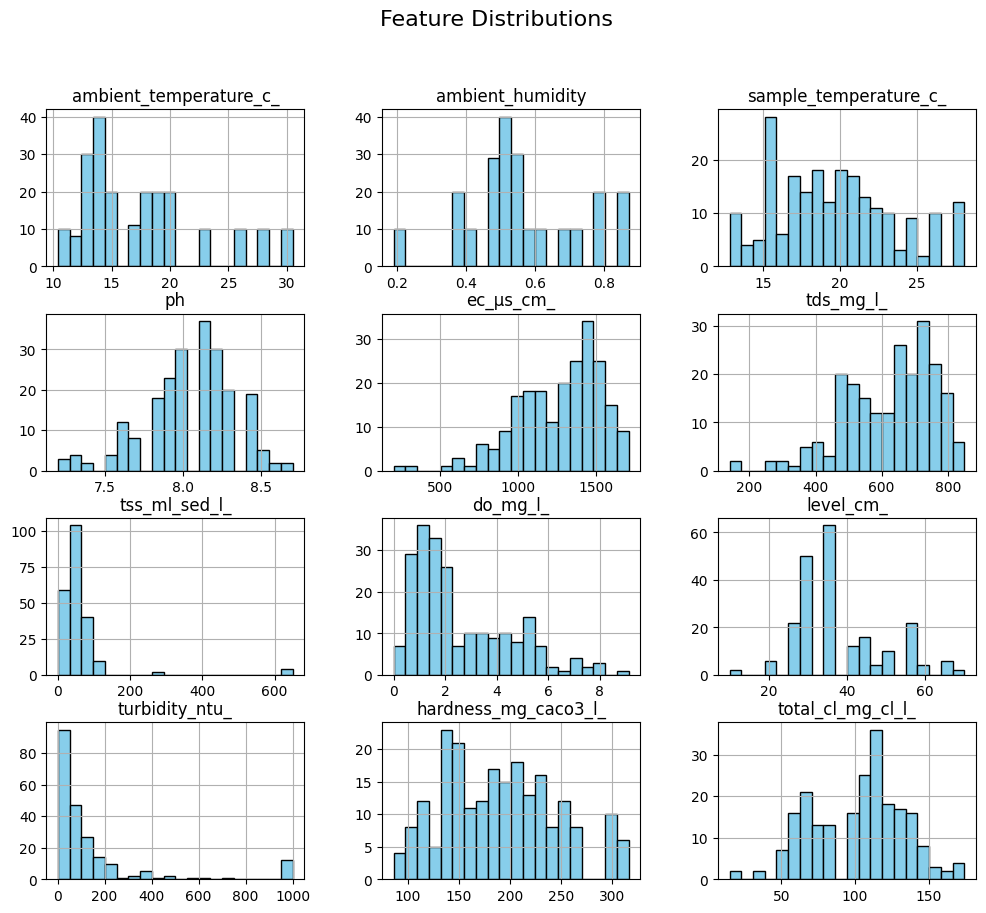

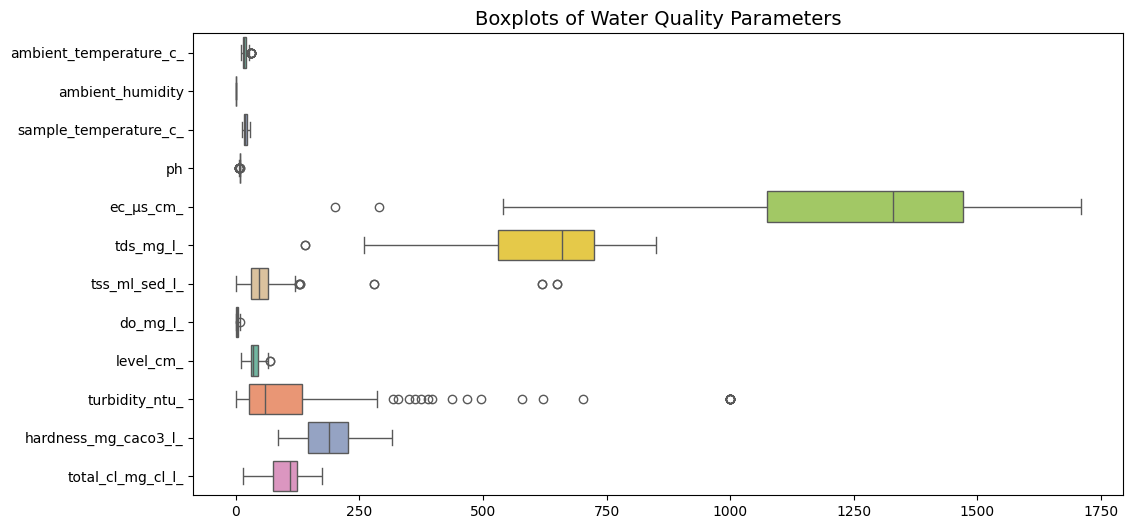

In [149]:
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of Water Quality Parameters", fontsize=14)
plt.show()


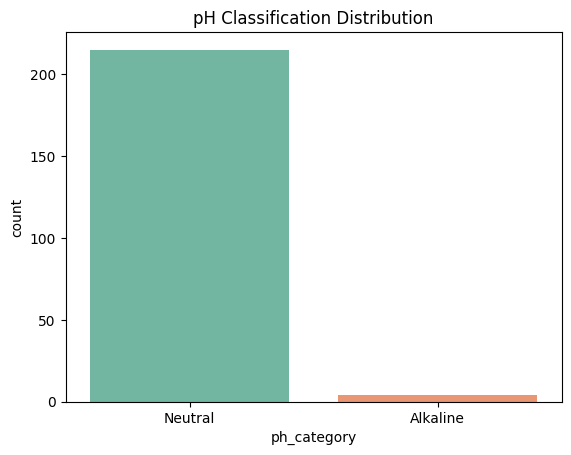

In [147]:
ph_col = [col for col in df.columns if "ph_category" in col.lower()][0]

sns.countplot(data=df, x=ph_col, palette='Set2')
plt.title("pH Classification Distribution")
plt.show()


Water pH Levels and Suitability for Consumption

Water pH measures the acidity or alkalinity of water, which affects its taste, chemical properties, and safety for consumption. The scale ranges from 0 to 14:

< 7	Acidic	⚠ Not ideal	    Acidic water can corrode pipes, leach metals, and may indicate pollution. Not generally suitable for long-term consumption.

7 – 8.5	Neutral	✅ Safe	   Neutral to slightly alkaline water is ideal for drinking, cooking, and aquatic life. Most river water samples fall in this range.

> 8.5	Alkaline (Basic)	⚠ Caution	 Water with high alkalinity is generally safe but may affect taste, cause scaling in pipes, and impact mineral solubility. Occasional consumption is usually fin    


Most river water samples were neutral (around 7–8.5), indicating slightly alkaline conditions.

Few samples approached high alkalinity (> 8.5), which may influence water taste and the solubility of minerals.

Acidic water (<7) was rare or absent, suggesting minimal industrial/acidic pollution in the sampled areas.

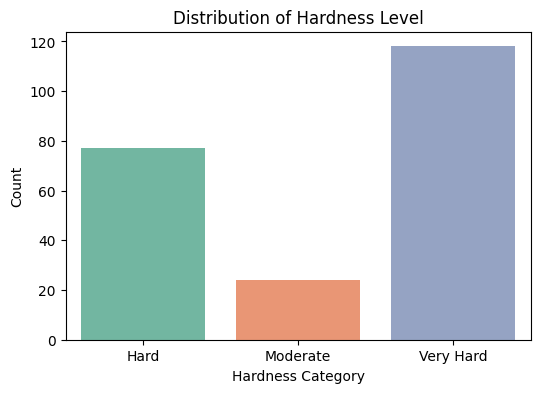

In [111]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='hardness_level', palette='Set2')
plt.title("Distribution of Hardness Level")
plt.xlabel("Hardness Category")
plt.ylabel("Count")
plt.show()



Water Hardness

Hardness Level	Local Term	CaCO₃ (mg/L)	Typical Turbidity	Water Quality Indicator

Soft	BLANDA	< 60	High (cloudy)	Dirty/High Suspended Solids

Moderate	SEMIDURA	60 – 119	Low/Moderate	Clear but with dissolved minerals

Hard	–	120 – 179	Low	Clear water; scaling possible

Very Hard	–	≥ 180	Low	Clear water; high scaling

Key Insights from EDA

Most water samples were neutral to slightly alkaline.

Hardness levels varied from soft to moderately hard in most samples.

Turbidity and hardness are not strictly correlated; some soft water samples are cloudy (high turbidity).

Strong correlation exists between EC and TDS, as expected.

Missing values were minimal and handled without dropping entire rows.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
# 1. Define Water Quality Classification Function
def classify_water_quality(row):
    """
    Classify water quality as Good, Moderate, or Poor
    based on pH, hardness, and turbidity.
    """
    ph, hardness, turbidity = row['ph'], row['hardness_mg_caco3_l'], row['turbidity_ntu']
    
    # Initialize as Good
    quality = "Good"
    
    # Check pH
    if ph < 6.5 or ph > 8.5:
        quality = "Moderate"
    
    # Check Hardness (mg/L CaCO3)
    if hardness > 200:  # Very hard water
        quality = "Moderate" if quality == "Good" else quality
    
    # Check Turbidity (NTU)
    if turbidity > 100:
        quality = "Poor"
    
    return quality

# Apply Classification

df['Water_Quality_Class'] = df.apply(classify_water_quality, axis=1)

# Check the distribution
df['Water_Quality_Class'].value_counts()


Water_Quality_Class
Poor        77
Moderate    75
Good        67
Name: count, dtype: int64

In [142]:
# Remove trailing underscores for easier reference
df.columns = df.columns.str.rstrip('_')


# Replace 'Water_Quality_Class' with your actual target column
# Example target could be a classification based on pH, hardness, turbidity, etc.
X = df[['ph', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l', 'hardness_mg_caco3_l']]

# Example target: Good / Moderate / Poor water quality
y = df['Water_Quality_Class']  

# Encode Categorical Target
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred = rf.predict(X_test_scaled)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.96      0.98        26
           2       1.00      1.00      1.00        19

    accuracy                           0.98        66
   macro avg       0.98      0.99      0.99        66
weighted avg       0.99      0.98      0.98        66




Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.96      0.98        26
           2       1.00      1.00      1.00        19

    accuracy                           0.98        66
   macro avg       0.98      0.99      0.99        66
weighted avg       0.99      0.98      0.98        66


Confusion Matrix:

[[21  0  0]
 [ 1 25  0]
 [ 0  0 19]]


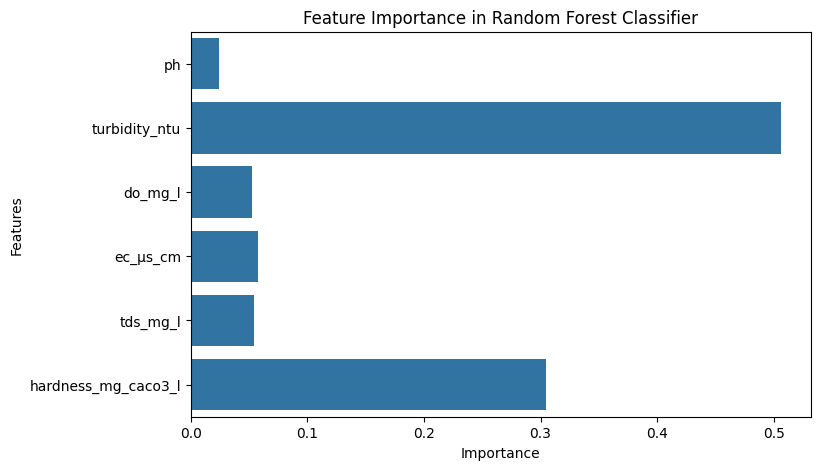

In [145]:
# Features and Target
X = df[['ph', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l', 'hardness_mg_caco3_l']]
y = df['Water_Quality_Class']

# 4. Encode Target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)

# Scale Features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions & Evaluation
y_pred = rf.predict(X_test_scaled)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance in Random Forest Classifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


Water Quality Classification Criteria

pH	6.5 – 8.5	Good	Safe for consumption

	< 6.5 or > 8.5	Moderate	Slightly acidic or alkaline

Hardness	< 60 mg/L (Soft)	Good	Low mineral content

	60 – 120 mg/L (Moderately Hard)	Good/Moderate	Acceptable for most uses

	120 – 200 mg/L (Hard)	Moderate	High mineral content

	> 200 mg/L (Very Hard)	Moderate/Poor	Can affect taste and scaling

Turbidity	≤ 5 NTU	Good	Clear water

	5 – 100 NTU	Moderate	Some suspended particles

	> 100 NTU	Poor	Very cloudy; unsafe without treatment
	
Explanation

Water is classified as Good if pH, hardness, and turbidity are all within safe ranges.

Moderate indicates slightly elevated minerals, acidity/alkalinity, or turbidity, which may need treatment.

Poor water fails at least one critical parameter (usually high turbidity), making it unsafe for direct consumption.

In [146]:
# Assuming the Elbow shows a bend at K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

print("✅ K-Means clustering applied successfully.")
print(df['Cluster'].value_counts())

✅ K-Means clustering applied successfully.
Cluster
0    114
1     72
3     18
2     15
Name: count, dtype: int64


In [154]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

print("Cluster column added successfully!")
print(df['Cluster'].value_counts())




Cluster column added successfully!
Cluster
0    114
1     72
3     18
2     15
Name: count, dtype: int64


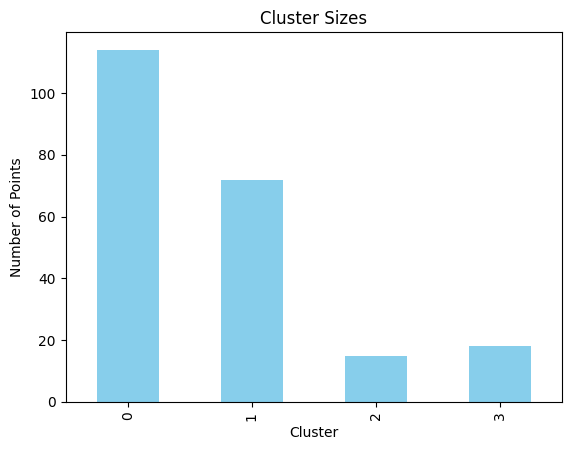

In [155]:
df['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Points")
plt.show()


K-Means has identified 4 distinct patterns in your data (since K=4 from the Elbow method).

Cluster sizes suggest that most observations are concentrated in a few “typical” patterns (Clusters 0 and 1), while the small clusters (2 and 3) might indicate unique cases worth examining individually.

In [159]:

# Ensure your Cluster column exists
if 'Cluster' not in df.columns:
    raise ValueError("Cluster column not found. Run K-Means and add df['Cluster'] first.")

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# --- Numeric summary: mean, std, min, max ---
numeric_summary = df.groupby('Cluster')[numeric_cols].agg(['mean', 'std', 'min', 'max'])
print("📊 Numeric Feature Summary by Cluster:\n")
print(numeric_summary)

# --- Categorical summary: most common value ---
def most_common(series):
    return series.value_counts().index[0] if not series.empty else None

categorical_summary = df.groupby('Cluster')[categorical_cols].agg(most_common)
print("\n📊 Categorical Feature Summary by Cluster:\n")
print(categorical_summary)

# --- Optional: Cluster sizes ---
print("\n📊 Cluster Sizes:\n")
print(df['Cluster'].value_counts().sort_index())


📊 Numeric Feature Summary by Cluster:

        ambient_temperature_c_                  ambient_humidity            \
                          mean  std   min   max             mean  std  min   
Cluster                                                                      
0                        18.42 5.47 10.40 30.50             0.55 0.18 0.19   
1                        16.39 4.77 10.40 30.50             0.55 0.15 0.19   
2                        21.17 4.17 15.20 27.60             0.55 0.17 0.36   
3                        14.73 1.83 13.00 18.00             0.67 0.12 0.52   

             sample_temperature_c_       ... hardness_mg_caco3_l_         \
         max                  mean  std  ...                  min    max   
Cluster                                  ...                               
0       0.87                 19.80 3.71  ...               106.00 269.00   
1       0.87                 18.88 4.41  ...                86.00 316.00   
2       0.87                 19.83

📊 Numeric Feature Summary by Cluster:

        ambient_temperature_c_                  ambient_humidity            \
                          mean  std   min   max             mean  std  min   
Cluster                                                                      
0                        18.42 5.47 10.40 30.50             0.55 0.18 0.19   
1                        16.39 4.77 10.40 30.50             0.55 0.15 0.19   
2                        21.17 4.17 15.20 27.60             0.55 0.17 0.36   
3                        14.73 1.83 13.00 18.00             0.67 0.12 0.52   

             sample_temperature_c_       ... turbidity_ntu_          \
         max                  mean  std  ...            min     max   
Cluster                                  ...                          
0       0.87                 19.80 3.71  ...           4.47  496.00   
1       0.87                 18.88 4.41  ...           1.06  388.00   
2       0.87                 19.83 2.54  ...         579.00

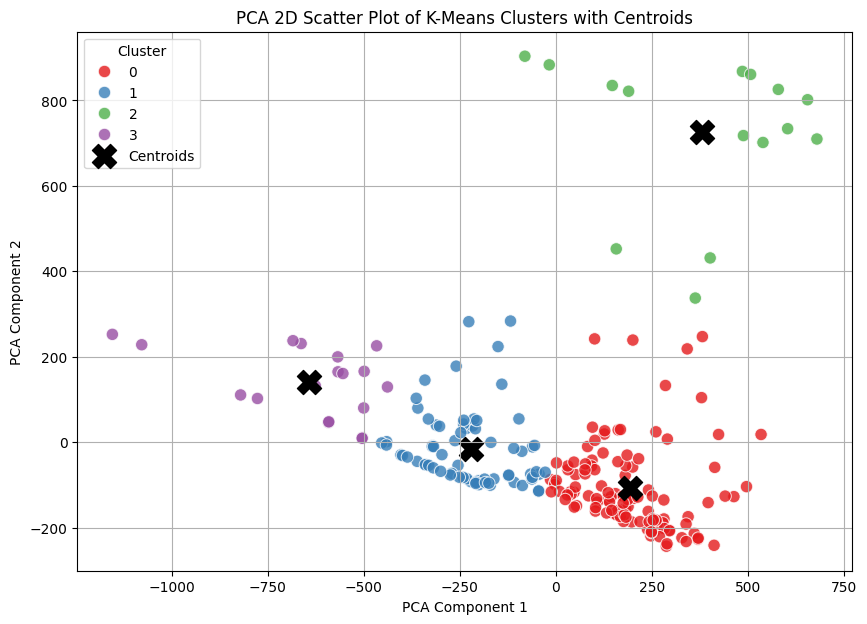

In [161]:
# --- Ensure Cluster column exists ---
if 'Cluster' not in df.columns:
    raise ValueError("Cluster column not found. Run K-Means first.")

# --- Separate numeric and categorical columns ---
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('Cluster')  # exclude label
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# --- Numeric Summary ---
numeric_summary = df.groupby('Cluster')[numeric_cols].agg(['mean', 'std', 'min', 'max'])
print("📊 Numeric Feature Summary by Cluster:\n")
print(numeric_summary)

# --- Categorical Summary (most common value) ---
def most_common(series):
    return series.value_counts().index[0] if not series.empty else None

if categorical_cols:
    categorical_summary = df.groupby('Cluster')[categorical_cols].agg(most_common)
    print("\n📊 Categorical Feature Summary by Cluster:\n")
    print(categorical_summary)

# --- Cluster Sizes ---
print("\n📊 Cluster Sizes:\n")
print(df['Cluster'].value_counts().sort_index())

# --- PCA for Visualization ---
X_numeric = df[numeric_cols]
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_numeric)

plot_df = df.copy()
plot_df['PCA1'] = X_pca[:,0]
plot_df['PCA2'] = X_pca[:,1]

# --- Compute cluster centroids in PCA space ---
centroids = plot_df.groupby('Cluster')[['PCA1','PCA2']].mean()

# --- Plot ---
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=plot_df,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set1',
    s=80,
    alpha=0.8
)
# Plot centroids
plt.scatter(
    centroids['PCA1'],
    centroids['PCA2'],
    s=300,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title("PCA 2D Scatter Plot of K-Means Clusters with Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()


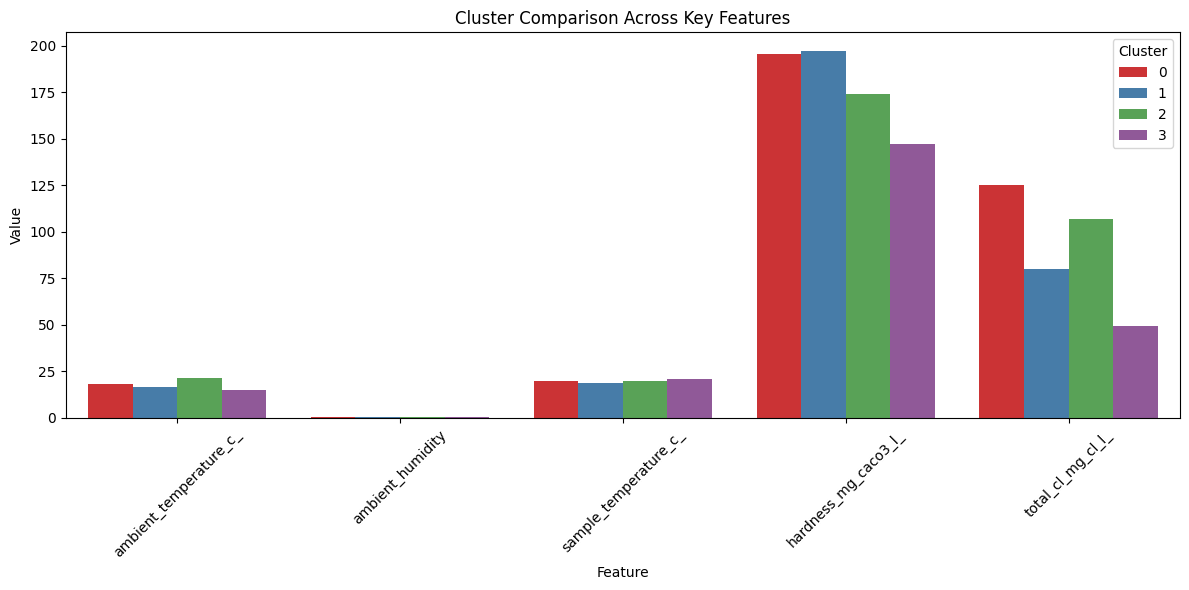

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few key features to compare (adjust as needed)
key_features = ['ambient_temperature_c_', 'ambient_humidity', 
                'sample_temperature_c_', 'hardness_mg_caco3_l_', 'total_cl_mg_cl_l_']

# Melt the dataframe for easier plotting
plot_df = df.melt(id_vars='Cluster', value_vars=key_features, var_name='Feature', value_name='Value')

plt.figure(figsize=(12,6))
sns.barplot(data=plot_df, x='Feature', y='Value', hue='Cluster', ci=None, palette='Set1')
plt.title("Cluster Comparison Across Key Features")
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.xlabel("Feature")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


Key Insights

Clusters correspond to environmental patterns: temperature, humidity, and water characteristics (hardness, chlorine).

Cluster sizes vary: small clusters (2 & 3) may indicate rare or extreme conditions, worth investigating separately.

Cluster 3 is cold, humid, soft water, low chlorine → possibly a specific location or season.

Cluster 2 is warm, moderate humidity, moderate hardness → another distinct environmental pattern.

Cluster 0 and 1 represent common conditions with moderate variability.

✅ Overall, the clustering successfully segmented the data into distinct environmental/water quality patterns, which could be used for further analysis, anomaly detection, or targeted interventions.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
